In [0]:
# !pip install firebase
# !pip install firestore
# uploaded = files.upload()
# import os
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/spotify-f1cf5-firebase-adminsdk-xxrd4-763e07c601.json'
# import firebase_admin
# from firebase_admin import credentials
# from google.cloud import firestore

In [0]:
# cred = credentials.Certificate('/content/spotify-f1cf5-firebase-adminsdk-xxrd4-763e07c601.json')
# firebase_admin.initialize_app(cred, {
#     'databaseURL': 'https://spotify-f1cf5.firebaseio.com'
# })

# db = firestore.Client()

# tracks_ref = db.collection(u'tracks')
# tracks = tracks_ref.stream()

# track_list = []
# for track in tracks:
#   track_list.append(track.to_dict())
# track_table = pd.DataFrame(track_list)

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving cleaned_tracks_genre.csv to cleaned_tracks_genre.csv


In [0]:
track_table = pd.read_csv("cleaned_tracks_genre.csv")

In [0]:
track_table.head()

,track_name,track_id,track_spotify_genre,art_name,art_id,alb_name,alb_id,art_genre,track_pop,duration_ms,time_signature,key,loudness,energy,speechiness,acousticness,mode,tempo,valence,danceability,instrumentalness,liveness,genre_words,master_popular_genre
0,"Serenade No. 10 in B-Flat Major, K. 361 ""Gran ...",4veYG42QMEq4earFYaqQiv,classical,Various Artists,0LyfQWJT6nXafLPZqxe9Of,The 99 Most Essential Classical Pieces in Movies,3YiIt9BdBWFwyFQo7HfOo2,[],0,366840,4,3,-22.673,0.0757,0.0417,0.985,1,65.366,0.0399,0.0623,0.867,0.1280,{},NaN
1,"Serenade No. 13 in G Major, K. 525 ""Eine klein...",6zhAEJnZWdREXsHOUiwnzI,classical,Various Artists,0LyfQWJT6nXafLPZqxe9Of,Relax with Classical Music,3TQdPQHGmfw7EOQduHQPIJ,[],1,404227,4,0,-23.389,0.0445,0.0501,0.884,1,120.298,0.1080,0.3230,0.794,0.1250,{},NaN
2,"Piano Sonata No.2 In F, K.280: 2. Adagio",0dhMIJPOjIYoeytaOQdKwc,classical,Various Artists,0LyfQWJT6nXafLPZqxe9Of,Valentine & Valentine: Eternal Love Songs,7qEwEOFbfFIYRjZgtXwewD,[],1,270000,3,8,-24.439,0.0182,0.0691,0.994,1,59.892,0.1650,0.3660,0.920,0.1110,{},NaN
3,"Clarinet Quintet in A Major, K. 581: II. Largh...",0z3yya2z38QRVZpYsXLCoG,classical,Various Artists,0LyfQWJT6nXafLPZqxe9Of,Relax with Classical Music,3TQdPQHGmfw7EOQduHQPIJ,[],0,421059,4,2,-23.086,0.0445,0.0479,0.982,1,74.480,0.0481,0.0950,0.880,0.1060,{},NaN
4,"Piano Sonata No. 16 in C Major, K. 545 ""Sonata...",53RgJbhmQqeXuolX71bBUB,classical,Various Artists,0LyfQWJT6nXafLPZqxe9Of,Relax with Classical Music,3TQdPQHGmfw7EOQduHQPIJ,[],1,224146,4,0,-26.304,0.0332,0.0617,0.995,1,91.972,0.3320,0.6010,0.890,0.0636,{},NaN


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
track_table_numerics = track_table.select_dtypes(include=[np.number])

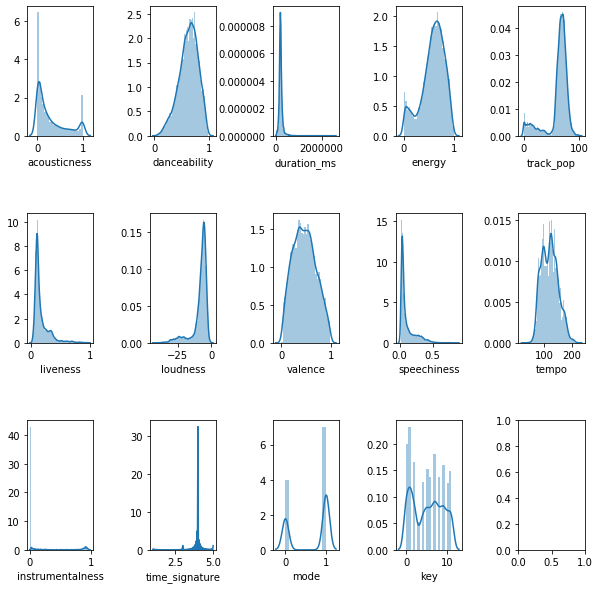

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
 
f, axes = plt.subplots(3, 5, figsize=(10, 10))
plt.subplots_adjust(wspace=.85, hspace=.6)
sns.distplot( track_table_numerics["acousticness"] , ax=axes[0, 0])
sns.distplot( track_table_numerics["danceability"] , ax=axes[0, 1])
sns.distplot( track_table_numerics["duration_ms"] , ax=axes[0, 2])
sns.distplot( track_table_numerics["energy"] , ax=axes[0, 3])
sns.distplot( track_table_numerics["track_pop"] , ax=axes[0, 4])
sns.distplot( track_table_numerics["liveness"] , ax=axes[1, 0])
sns.distplot( track_table_numerics["loudness"] , ax=axes[1, 1])
sns.distplot( track_table_numerics["valence"] , ax=axes[1, 2])
sns.distplot( track_table_numerics["speechiness"] , ax=axes[1, 3])
sns.distplot( track_table_numerics["tempo"] , ax=axes[1, 4])
sns.distplot( track_table_numerics["instrumentalness"] , ax=axes[2, 0])
sns.distplot( track_table_numerics["time_signature"] , ax=axes[2, 1])
sns.distplot( track_table_numerics["mode"] , ax=axes[2, 2])
sns.distplot( track_table_numerics["key"] , ax=axes[2, 3])

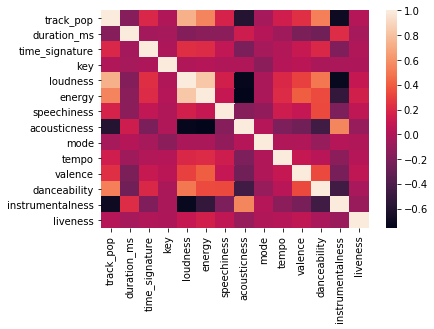

In [0]:
sns.heatmap(track_table_numerics.corr())

Might be worth dropping Instrumentalness, high p-value anyway. or Loudness?


In [0]:
track_table_dummies = pd.get_dummies(track_table,columns=['key','time_signature','track_spotify_genre'],drop_first=True)
track_table_dummies.drop(['loudness', 'master_popular_genre'], axis=1)
track_table_dummies = track_table_dummies.select_dtypes(include=[np.number])
#track_table_dummies = pd.get_dummies(track_table_numerics,columns=['time_signature','mode'],drop_first=True)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

In [0]:
X = track_table_dummies.iloc[:,1:]
y = track_table_dummies.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
track_table_dummies

,track_pop,duration_ms,loudness,energy,speechiness,acousticness,mode,tempo,valence,danceability,instrumentalness,liveness,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,track_spotify_genre_country,track_spotify_genre_hip-hop,track_spotify_genre_house,track_spotify_genre_indie,track_spotify_genre_pop,track_spotify_genre_r&b,track_spotify_genre_rap,track_spotify_genre_rock,track_spotify_genre_trap
0,0,366840,-22.673,0.0757,0.0417,0.98500,1,65.366,0.0399,0.0623,0.867000,0.1280,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,404227,-23.389,0.0445,0.0501,0.88400,1,120.298,0.1080,0.3230,0.794000,0.1250,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,270000,-24.439,0.0182,0.0691,0.99400,1,59.892,0.1650,0.3660,0.920000,0.1110,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,421059,-23.086,0.0445,0.0479,0.98200,1,74.480,0.0481,0.0950,0.880000,0.1060,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,224146,-26.304,0.0332,0.0617,0.99500,1,91.972,0.3320,0.6010,0.890000,0.0636,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,65,165214,-8.192,0.4720,0.3060,0.49400,0,190.011,0.3870,0.7340,0.002930,0.1020,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9996,61,87313,-2.625,0.7520,0.1350,0.00754,0,134.039,0.4890,0.9440,0.010700,0.1410,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
9997,63,195160,-10.615,0.4980,0.0776,0.22300,1,126.972,0.2440,0.7590,0.000058,0.4060,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9998,63,221641,-12.860,0.4460,0.1650,0.67500,0,94.024,0.3520,0.7190,0.000000,0.1220,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


## Linear Regression

In [0]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              track_pop   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              8854.
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                        0.00
Time:                        00:11:00   Log-Likelihood:                         -24619.
No. Observations:                6700   AIC:                                  4.931e+04
Df Residuals:                    6666   BIC:                                  4.954e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
duration_ms                  7.823e-06   1.42e-06      5.519      0.000    5.04e-06    1.06e-05
loudness                        0.0269      0.044      0.615      0.538      -0.059       0.113
energy                         -2.5556      1.031     -2.479      0.013      -4.577      -0.535
speechiness                    -8.3276      1.278     -6.517      0.000     -10.833      -5.822
acousticness                    1.4045      0.600      2.343      0.019       0.229       2.580
mode                           -0.0944      0.259     -0.364      0.716      -0.602       0.414
tempo                           0.0028      0.004      0.697      0.486      -0.005       0.011
valence                         3.0116      0.637      4.725      0.000       1.762       4.261
danceability                    7.2462      1.014      7.150      0.000       5.259       9.233
instrumentalness               -3.2035      0.799     -4.008      0.000      -4.770      -1.637
liveness                       -1.7593      0.916     -1.920      0.055      -3.556       0.037
key_1                          -0.1879      0.485     -0.388      0.698      -1.138       0.762
key_2                           0.6567      0.524      1.252      0.211      -0.371       1.685
key_3                          -0.0868      0.775     -0.112      0.911      -1.606       1.432
key_4                          -1.1488      0.576     -1.996      0.046      -2.277      -0.020
key_5                          -0.1844      0.534     -0.345      0.730      -1.232       0.863
key_6                           0.5404      0.550      0.983      0.326      -0.537       1.618
key_7                           0.4670      0.512      0.912      0.362      -0.537       1.471
key_8                           0.0470      0.547      0.086      0.932      -1.025       1.119
key_9                           0.7940      0.527      1.508      0.132      -0.238       1.826
key_10                          1.0204      0.568      1.797      0.072      -0.093       2.133
key_11                         -0.2012      0.544     -0.370      0.712      -1.269       0.866
time_signature_3                7.6039      1.142      6.658      0.000       5.365       9.843
time_signature_4                8.6871      1.070      8.117      0.000       6.589      10.785
time_signature_5                5.7240      1.318      4.342      0.000       3.140       8.308
track_spotify_genre_country    48.6655      0.914     53.228      0.000      46.873      50.458
track_spotify_genre_hip-hop    55.9705      0.982     57.020      0.000      54.046      57.895
track_spotify_genre_house      46.0159      0.949     48.499      0.000      44.156      47.876
track_sp

In [0]:
print("Linear Regression:")
print("Test mean absolute error:", mean_absolute_error(y_test, results.predict(X_test)))
mse = mean_squared_error(y_test,results.predict(X_test))
print("Test mean-squared error:", mse)
print("Test root mean squared error:", np.sqrt(mse))


Linear Regression:
Test mean absolute error: 6.226302906046233
Test mean-squared error: 96.99672014725572
Test root mean squared error: 9.848691291093234


## Random Forest

In [0]:
rf_param_grid = {
              'n_estimators':range(50,120, 10),
              'max_depth':range(3,10),
              'min_samples_split': [0.05, 0.1]
}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=3).fit(X_train, y_train)
# summarize the results of the grid search

In [0]:
print("The best score is {}".format(rf_grid.best_score_))
print("The best hyper parameter setting is {}".format(rf_grid.best_params_))

The best score is 0.4532165743513661
The best hyper parameter setting is {'max_depth': 9, 'min_samples_split': 0.01, 'n_estimators': 100}


In [0]:
print("Random Forest:")
print("Test mean absolute error:", mean_absolute_error(y_test, rf_grid.predict(X_test)))
mse = mean_squared_error(y_test,rf_grid.predict(X_test))
print("Test mean-squared error:", mse)
print("Test root mean squared error:", np.sqrt(mse))

Random Forest:
Test mean absolute error: 12.69720769198164
Test mean-squared error: 341.7906062533964
Test root mean squared error: 18.487579783557294


## Gradient Boost

In [0]:
gb_param_grid = {
     #'learning_rate': [.01,.1,1],
     'learning_rate':[.1],
     #'max_depth': [3,4,5],
     'max_depth':[6],
     #'n_estimators': range(50,150,20),
     'n_estimators':[130],
     #'min_samples_split': [0.01, 0.05, 0.1]
     'min_samples_split':[.01] 
}

gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=3).fit(X_train, y_train)

# summarize the results of the grid search
print("The best score is {}".format(gb_grid.best_score_))
print("The best hyper parameter setting is {}".format(gb_grid.best_params_))

The best score is 0.7801691398878811
The best hyper parameter setting is {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 0.01, 'n_estimators': 130}


In [0]:
print("Gradient Boost:")
print("Test mean absolute error:", mean_absolute_error(y_test, gb_grid.predict(X_test)))
mse = mean_squared_error(y_test,gb_grid.predict(X_test))
print("Test mean-squared error:", mse)
print("Test root mean squared error:", np.sqrt(mse))

Gradient Boost:
Test mean absolute error: 6.027307858661075
Test mean-squared error: 82.97890772006181
Test root mean squared error: 9.109275916342737


## Neural Network

In [0]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [0]:
nn_param_grid = {
     'activation': ['logistic', 'relu'],
     'learning_rate': ['constant','adaptive'],
     'learning_rate_init': [.001,.01],
     'hidden_layer_sizes': [3,5,10,50,100],
     'max_iter': [400]

}

nn_grid = GridSearchCV(MLPRegressor(), nn_param_grid, cv=3).fit(X_train, y_train)

# summarize the results of the grid search
print("The best score is {}".format(nn_grid.best_score_))
print("The best hyper parameter setting is {}".format(nn_grid.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The best score is -0.00020061230482519102
The best hyper parameter setting is {'activation': 'logistic', 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 400}


In [0]:
print("Neural Network:")
print("Test mean absolute error:", mean_absolute_error(y_test, nn_grid.predict(X_test)))
mse = mean_squared_error(y_test,nn_grid.predict(X_test))
print("Test mean-squared error:", mse)
print("Test root mean squared error:", np.sqrt(mse))

Neural Network:
Test mean absolute error: 30.756010822922278
Test mean-squared error: 1044.8761253483272
Test root mean squared error: 32.324543698996386


## SVM

In [0]:
from sklearn.svm import SVR

In [0]:
svm_param_grid = {
    'degree': [2,3,4,5],
    'kernel': ['rbf','poly','sigmoid']
}

svm_grid = GridSearchCV( SVR(), svm_param_grid, cv= 3).fit(X_train, y_train)

# summarize the results of the grid search
print("The best score is {}".format(svm_grid.best_score_))
print("The best hyper parameter setting is {}".format(svm_grid.best_params_))

The best score is 0.12039159304031559
The best hyper parameter setting is {'degree': 2, 'kernel': 'rbf'}


In [0]:
print("SVM:")
print("Test mean absolute error:", mean_absolute_error(y_test, svm_grid.predict(X_test)))
mse = mean_squared_error(y_test,svm_grid.predict(X_test))
print("Test mean-squared error:", mse)
print("Test root mean squared error:", np.sqrt(mse))

SVM:
Test mean absolute error: 14.458539006100642
Test mean-squared error: 510.92211920850553
Test root mean squared error: 22.60358642358565


<Figure size 864x576 with 0 Axes>

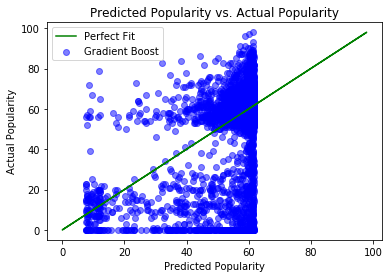

<Figure size 864x576 with 0 Axes>

In [0]:
gb_pred = svm_grid.predict(X_test)
plt.scatter(x=gb_pred, y=y_test, alpha=.5, color = 'b', label = "Gradient Boost")
#plt.scatter(x=ada_pred, y=test_y, alpha=.5, color = 'r', label = "Ada Boost")
plt.plot(y_test, y_test, color = 'g', label = 'Perfect Fit')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.legend(loc='upper left')
plt.title("Predicted Popularity vs. Actual Popularity")
plt.figure(figsize=(12,8))

## Visualizing Error

<Figure size 864x576 with 0 Axes>

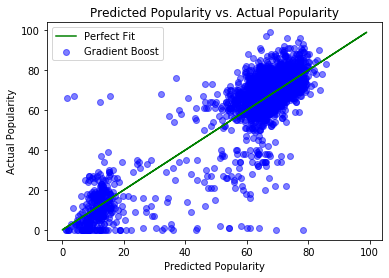

<Figure size 864x576 with 0 Axes>

In [0]:
gb_pred = gb_grid.predict(X_test)
plt.scatter(x=gb_pred, y=y_test, alpha=.5, color = 'b', label = "Gradient Boost")
#plt.scatter(x=ada_pred, y=test_y, alpha=.5, color = 'r', label = "Ada Boost")
plt.plot(y_test, y_test, color = 'g', label = 'Perfect Fit')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.legend(loc='upper left')
plt.title("Predicted Popularity vs. Actual Popularity")
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

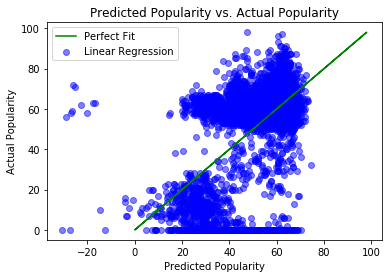

<Figure size 864x576 with 0 Axes>

In [0]:
reg_pred = results.predict(X_test)
plt.scatter(x=reg_pred, y=y_test, alpha=.5, color = 'b', label = "Linear Regression")
#plt.scatter(x=ada_pred, y=test_y, alpha=.5, color = 'r', label = "Ada Boost")
plt.plot(y_test, y_test, color = 'g', label = 'Perfect Fit')
plt.xlabel('Predicted Popularity')
plt.ylabel('Actual Popularity')
plt.legend(loc='upper left')
plt.title("Predicted Popularity vs. Actual Popularity")
plt.figure(figsize=(12,8))